# Fehlerwahrscheinlichkeiten und Transinformation

## MAP- und ML-Detektion

Die Hauptaufgabe eines Empfängers ist die Detektion der gesendeten Datensymbole $x$. Für die Detektion existieren verschiedene Kriterien. In der folgenden Herleitung wird angenommen, dass das 1. Nyquist-Kriterium erfüllt ist (keine Intersymbolinterferenz) und dass nur weißes, gaussverteiltes Rauschen $w$ die Übertragung stört. Unter diesen Annahmen kann das Empfangssymbol $y$ zu einem beliebigen Zeitpunkt durch

\begin{equation}
    y = x + w 
\end{equation}

dargestellt werden. Der MAP-Detektor (Maximum-A-Posteriori) maximiert die A-Posteori-Wahrscheinlichkeit $\Pr\{ \tilde{x} \mid y \}$. Mit der Regel von Bayes kann sich durch

\begin{equation}
    \Pr\{ \tilde{x} \mid y \} = p(y \mid \tilde{x}) \cdot \frac{\Pr\{ \tilde{x}\}}{p(y)}
\end{equation}

ausgedrückt werden. Dies führt zu folgender Beschreibung des MAP-Detektors.

\begin{equation}
    \hat{x}^{\mathsf{MAP}}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \log \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Big[ \log p(y \mid \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big] 
\end{equation}

Offensichtlich hängt der Detektor von der Likelihood-Funktion $p(y \mid \tilde{x})$ und den A-Priori-Wahrscheinlichkeiten $\Pr\{ \tilde{x}\}$ der Datensymbole ab. Der MAP-Detektor wägt dabei in optimaler Weise den Einfluss der Beobachtung $y$ und des A-Priori-Wissens ab und bestimmt das wahrscheinlichste Datensymbol gegeben die Beobachtung $y$.

Sind alle $M$ Datensymbole gleich wahrscheinlich, wird die A-Priori-Wahrscheinlichkeit $\Pr \{ x \} = \frac{1}{M}$ zu einer Konstanten und kann weggelassen werden. Dies führt zum Maximum-Likelihood-Detektor

\begin{equation}
    \hat{x}^{\mathsf{ML}} = \arg \! \max_{\tilde{x} \in \mathbb{X}} p(y \mid \tilde{x})  = \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid \tilde{x}) \; .
\end{equation}

Die Likelihood-Funktion gibt die Wahrscheinlichkeitsdichte von $y$ bei gegebenem $\tilde{x}$ an und stellt daher für $\tilde{x}=x$ die Dichte des Rauschens dar.

Für einen AWGN-Kanal mit gaußverteiltem Rauschen können die Gleichungen für MAP- und ML-Detektor weiter umgeschrieben werden. 

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big]
      = \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - \tilde{x}|^2 -\sigma_{\cal W}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - \tilde{x}|^2 \; .
\end{align*}

Der ML-Detektor sucht das Datensymbol mit der kleinsten quadratischen Euklidischen Distanz zum empfangenen Symbol $y$. Der MAP-Detektor erweitert diesen Ausdruck um die A-Priori-Wahrscheinlichkeit der Hypothesen $\tilde{x}$. Je größer sie ist, desto größer ist auch ihr Bias. Bei kleinen SNRs ist das Rauschen sehr stark (große Varianz $\sigma_{\cal W}^2$) und das A-Priori-Wissen dominiert die Entscheidung. Dies ist sinnvoll da die Beobachtung $y$ sehr unzuverlässig ist. Bei großen SNRs ist die Rauschvarianz $\sigma_{\cal W}^2$ hingegen klein und das empfangene Symbol $y$ vertrauenswürdig. Es dominiert in diesem Fall die Entscheidung.


## Symbol Error Probabilities

Auch wenn die Detektion nach optimalen Kriterien durchgeführt wird, gibt es keine Garantie für ein fehlerfreies Ergebnis. Es besteht immer das Risiko einer Fehlentscheidung, d.h. der Detektor entscheidet sich für das falsche Symbol $\hat{x} \neq x$. Dies passiert bei gaußverteiltem Rauschen und ML-Detektion, wenn das ein falsches Symbol $\tilde{x} \neq x$ dichter am empfangenen Symbol $y$ liegt als das Sendesymbol $x$. Die Wahrscheinlichkeit für dieses Ereignis wird als paarweise Fehlerwahrscheinlichkeit bezeichnet und ist eine Funktion des SNRs und des Modulationsverfahrens. Ihre Berechnung erfordert die Integration der Likelihood-Funktion über einem bestimmten Intervall. Dieses Integral ist nicht geschlossen lösbar, so dass numerische Lösungen verwendet werden müssen. Sie werden durch die gaußsche Fehlerunktion $\mathrm{erf}(x)$ und ihr Komplement $\mathrm{erfc}(x)=1-\mathrm{erf}(x)$ definiert. Sie sind zu 

\begin{align*}
    \mathrm{erf}(x) &= \frac{2}{\sqrt{\pi}} \cdot \int_0^x e^{- \xi^2} \ d\xi \\
    \mathrm{erfc}(x) &= 1 - \mathrm{erf}(x)
    = \frac{2}{\sqrt{\pi}} \cdot \int_x^{\infty} e^{- \xi^2} \ d\xi
\end{align*}

definiert und im folgenden Diagramm dargestellt.

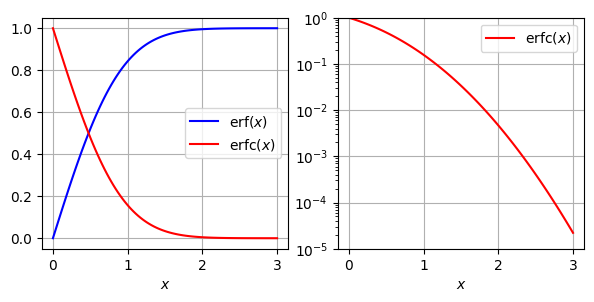

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

x = np.linspace(0,3,101)
ferf = erf(x)
ferfc = erfc(x)

fig1 = plt.figure(figsize=(7,3))
ax1a = fig1.add_subplot(121)
ax1a.plot(x, ferf, 'b-',label='$\mathrm{erf}(x)$')
ax1a.plot(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

ax1b = fig1.add_subplot(122)
ax1b.semilogy(x, ferfc, 'r-',label='$\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.ylim(1e-5,1)
plt.grid(True)
plt.legend()

Die Symbolfehlerwahrscheinlichkeiten für verschiedene lineare Modulationsverfahren sind Funktionen des SNRs und der kleinsten auf die Sendeleistung normierten quadratischen Euklidischen Distanz $\Delta_0^2$.

\begin{equation}
    \Delta_0^2 = \min_{x,\tilde{x} \in \mathbb{X} \atop x \neq \tilde{x}} 
        \frac{|x - \tilde{x}|^2}{\sigma_{\cal X}^2}
\end{equation}

Für ASK, PSK und QAM erhält man die folgenden Ausdrücke.

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}} 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{M^2-1} \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}} 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{2(M-1)} \frac{E_{\mathrm{s}}}{N_0} } \right) 
    = 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}} 
    &\approx \mathrm{erfc} \left( \sqrt{ \sin^2 \left( \frac{\pi}{M} \right) \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}

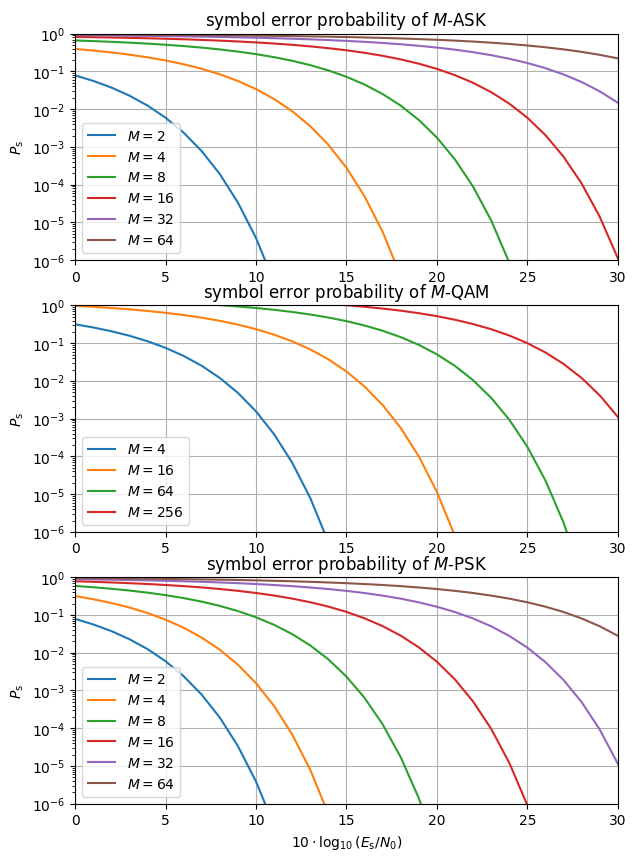

In [2]:
# definiton of signal to noise ratio
SNRdB = np.linspace(-10,40,51)
SNR = 10**(SNRdB/10)

# symbol error rates (SER) of ASK
M_ASK = np.array([2,4,8,16,32,64])
m_ASK = np.log2(M_ASK)
Mv,SNRv = np.meshgrid(M_ASK,SNR)
SER_ASK = (Mv-1)/Mv * erfc(np.sqrt(3.0/(Mv**2-1) * SNRv))

# symbol error rates (SER) of QAM
M_QAM = np.array([4,16,64,256])
m_QAM = np.log2(M_QAM)
Mv,SNRv = np.meshgrid(M_QAM,SNR)
SER_QAM = 2*(np.sqrt(Mv)-1)/np.sqrt(Mv) * erfc(np.sqrt(3.0/(2*(Mv-1)) * SNRv))

# symbol error rates (SER) of PSK
M_PSK = np.array([2,4,8,16,32,64])
m_PSK = np.log2(M_PSK)
SER_PSK = erfc(np.sqrt(np.outer(SNR,np.sin(np.pi/M_PSK)**2)))
# exact solution for M=2 (BPSK)
SER_PSK[:,0] = SER_PSK[:,0] / 2.0

fig2 = plt.figure(figsize=(7,10))
ax2a = fig2.add_subplot(311)
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax2a.semilogy(SNRdB, SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-ASK')
plt.legend()

ax2b = fig2.add_subplot(312)
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax2b.semilogy(SNRdB, SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-QAM')
plt.legend()

ax2c = fig2.add_subplot(313)
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax2c.semilogy(SNRdB, SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{s}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-PSK')
plt.legend()

## Symbolfehlerwahrscheinlichkeit und Energieeffizienz

Die mittlere Energie $E_{\mathrm{s}}$ eines Datensymbols ist mit der mittleren Energie $E_{\mathrm{b}}$ pro Informationsbit über $E_{\mathrm{s}}=m \cdot E_{\mathrm{b}}$ verbunden, wobei $m$ die Anzahl der Informationsbit pro Datensymbol repräsentiert. Das zugehörige Signal-Rausch-Verhältnis hat die Form

\begin{equation}
    \frac{E_{\mathrm s}}{N_0} = m \cdot \frac{E_{\mathrm b}}{N_0}
    \quad \Rightarrow \quad
    10 \cdot \log_{10} \frac{E_{\mathrm s}}{N_0} 
    = 10 \cdot \log_{10} m + 10 \cdot \log_{10} \frac{E_{\mathrm b}}{N_0} .
\end{equation}

Die Fehlerratenkurven über $E_{\mathrm{s}}/N_0$$ werden also horizontal um den Wert $10 \cdot \log_{10} m$, welcher nur von der Modulationsstufigkeit abhängt, verschoben. Diese Formd er Darstellung ist insbesonderen für die Betrachtung der Energieeffizienz interessant. Die entsprechenden Kurven sind unten dargestellt. Sie erlauben einen faireren Vergleich zwischen Modulationsverfahren unterschiedlicher Kardinalität $M$, da die mittlere Energie pro Informationsbit betrachtet wird. 

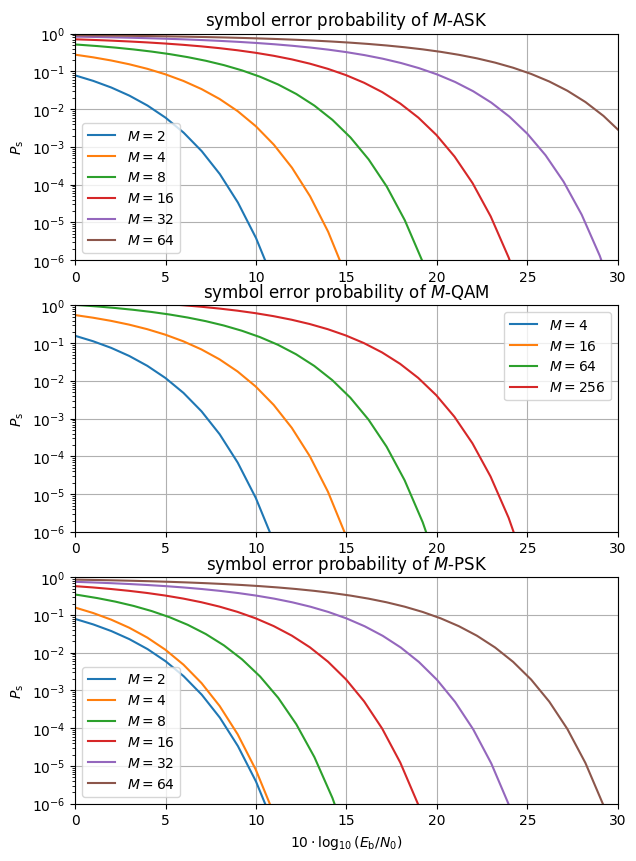

In [3]:
fig3 = plt.figure(figsize=(7,10))
ax3a = fig3.add_subplot(311)
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax3a.semilogy(SNRdB-10*np.log10(m_ASK[cntr]), SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-ASK')
plt.legend()

ax3b = fig3.add_subplot(312)
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax3b.semilogy(SNRdB-10*np.log10(m_QAM[cntr]), SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-QAM')
plt.legend()

ax3c = fig3.add_subplot(313)
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax3c.semilogy(SNRdB-10*np.log10(m_PSK[cntr]), SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.xlabel('$10 \cdot \log_{10}(E_{\mathrm{b}}/N_0)$')
plt.ylabel('$P_{\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$-PSK')
plt.legend()

## Transinformation als Funktion des SNR

In der Informationstheorie ist die Transinformation von großer Bedeutung. Für kontinuierliche Prozesse müssen dazu differentielle Entropien $h({\cal Y}$ und $h({\cal W}$ bestimmt werden. Die Transinformation ist als Differenz zweiter differentieller Entropien

\begin{align}
    I({\cal X};{\cal Y}) &= h({\cal Y}) - h({\cal Y} \mid {\cal X})
\end{align}

definiert. Der Term $h({\cal Y} \mid {\cal X})$ stellt die differentielle Entropie des Rauschens  $h({\cal W})$ dar und ist für eine bestimmte Rauschleistung konstant. Für digitale Modulationsverfahren ASK, QAM oder PSK mit diskreten Alphabeten kann die Transinformation nicht geschlossen berechnet werden, weil die Berechnung von $h({\cal Y)$ die Summe

\begin{align}
    p(y) = \sum_{x \in \mathbb{X}} p(y \mid x) \cdot \Pr \{ x\}
\end{align}

im Logarithm of steht. Sie kann nicht durch eine einfache analytische Funktion ersetzt werden.  Die Transinformation

\begin{align}
    I({\cal X};{\cal Y}) 
    = \sum_{x \in \mathbb{X}} \Pr\{ x \} \cdot 
      \int_{-\infty}^{\infty} p(y \mid x) \cdot \log_2 \frac{p(y \mid x)}{p(y)} \ dy
\end{align}

ist daher durch numerische Integration zu ermitteln. Ihre Einheit ist bit/s/Hz, sie beschreibt also die erreichbare Datenrate pro Hertz Bandbreite. Die Transinformation wird auch als spektrale Effizienz bezeichnet.

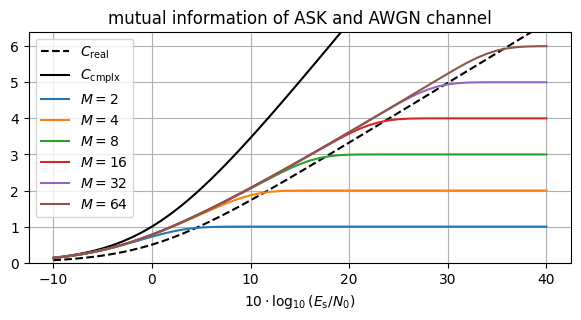

In [6]:
import sys

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from EXIT.info_theory import mi_awgn

Cgauss_real = 0.5 * np.log2(1+SNR)
Cgauss_cmplx = np.log2(1+SNR)

# ASK
I_ASK = np.zeros((len(SNRdB),len(M_ASK)))
for M,cntr in zip(M_ASK,range(len(M_ASK))):
    ASK = (M-1-2*np.arange(M), np.ones(M)/M)
    I_ASK[:,cntr] = mi_awgn(ASK[0],ASK[1],SNRdB,100)
    
fig4 = plt.figure(figsize=(7,3))
ax4a = fig4.add_subplot(111)
ax4a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax4a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_ASK,range(len(M_ASK))):
    ax4a.plot(SNRdB, I_ASK[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,6.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of ASK and AWGN channel')
plt.grid()


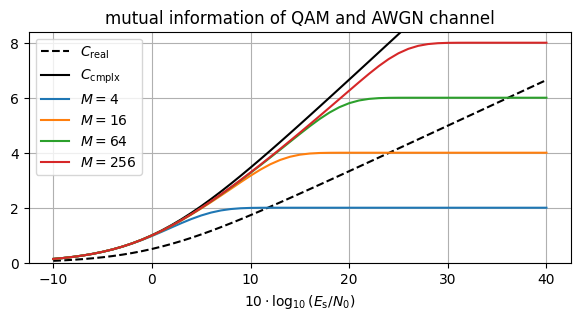

In [7]:
# QAM
I_QAM = np.zeros((len(SNRdB),len(M_QAM)))
for M,cntr in zip(M_QAM,range(len(M_QAM))):
    sqrtM = np.sqrt(M)
    ASK = sqrtM-1-2*np.arange(sqrtM)
    QAM = np.meshgrid(ASK,ASK)
    QAM = ((QAM[0] + 1j*QAM[1]).flatten(), np.ones(M)/M)
    I_QAM[:,cntr] = mi_awgn(QAM[0],QAM[1],SNRdB,100)
    
fig5 = plt.figure(figsize=(7,3))
ax5a = fig5.add_subplot(111)
ax5a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax5a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_QAM,range(len(M_QAM))):
    ax5a.plot(SNRdB, I_QAM[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,8.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of QAM and AWGN channel')
plt.grid()

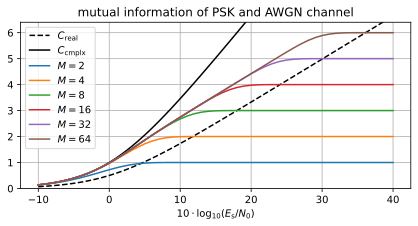

In [7]:
# PSK
I_PSK = np.zeros((len(SNRdB),len(M_PSK)))
for M,cntr in zip(M_PSK,range(len(M_PSK))):
    PSK = (np.exp(1j*2.0*np.pi*np.arange(M)/M), np.ones(M)/M)
    I_PSK[:,cntr] = mi_awgn(PSK[0],PSK[1],SNRdB,100)
    
fig6 = plt.figure(figsize=(7,3))
ax6a = fig6.add_subplot(111)
ax6a.plot(SNRdB, Cgauss_real, 'k--', label='$C_{\mathrm{real}}$')
ax6a.plot(SNRdB, Cgauss_cmplx, 'k-', label='$C_{\mathrm{cmplx}}$')
for run,cntr in zip(M_PSK,range(len(M_PSK))):
    ax6a.plot(SNRdB, I_PSK[:,cntr], '-',label='$M=$%g' %(run))
plt.ylim(0,6.4)
plt.legend()
plt.xlabel('$10 \cdot \log_{10} (E_{\mathrm{s}}/N_0)$')
plt.title('mutual information of PSK and AWGN channel')
plt.grid()

## Fehlerwahrscheinlichkeiten als Funktion der Transinformation

Die Abbildung unten zeigt die Fehlerraten linearer Modulationsverfahren als Funktion der Transinformation dar. Beide sind über das SNR miteinander verbunden. Es ist zu beobachten, dass kleine Fehlerwahrscheinlichkeiten unter $10^{-3}$ mit Transinformationen sehr nah am Maximalwert korrespondieren. Bei der 4-QAM mit $m=2$ bit/s/Hz wird eine Transinformation von $I({\cal X};{\cal Y}) \approx m=2$ bit/s/Hz benötigt, um eine Fehlerrate unter $10^{-3}$ zu erzielen. Schon kleine Abstände zwischen $I({\cal X};{\cal Y}$ und $m$ führen zu hohen Fehlerwahrscheinlichkeiten bei der uncodierten Übertragung. 

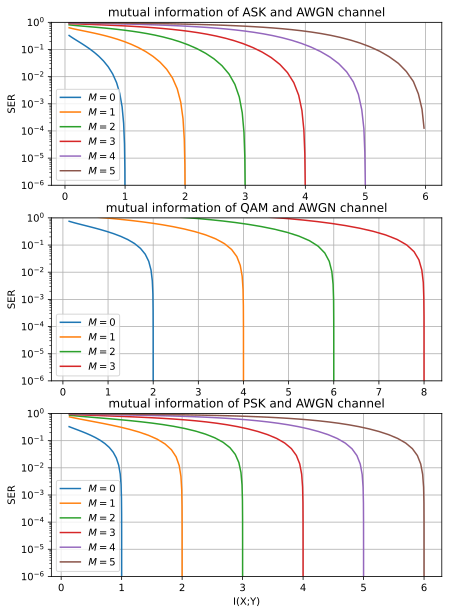

In [13]:
fig7 = plt.figure(figsize=(7,10))
ax7a = fig7.add_subplot(311)
for run in range(len(M_ASK)):
    ax7a.semilogy(I_ASK[:,run], SER_ASK[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
#plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of ASK and AWGN channel')
plt.grid()

ax7b = fig7.add_subplot(312)
for run in range(len(M_QAM)):
    ax7b.semilogy(I_QAM[:,run], SER_QAM[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
#plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of QAM and AWGN channel')
plt.grid()

ax7c = fig7.add_subplot(313)
for run in range(len(M_PSK)):
    ax7c.semilogy(I_PSK[:,run], SER_PSK[:,run], '-', label='$M=$%g' %(run))
plt.ylim(1e-6,1)
plt.legend()
plt.xlabel('I(X;Y)')
plt.ylabel('SER')
plt.title('mutual information of PSK and AWGN channel')
plt.grid()